## Initialization

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

## 7a Annealing for Traveling Saleman

6.180339887498948


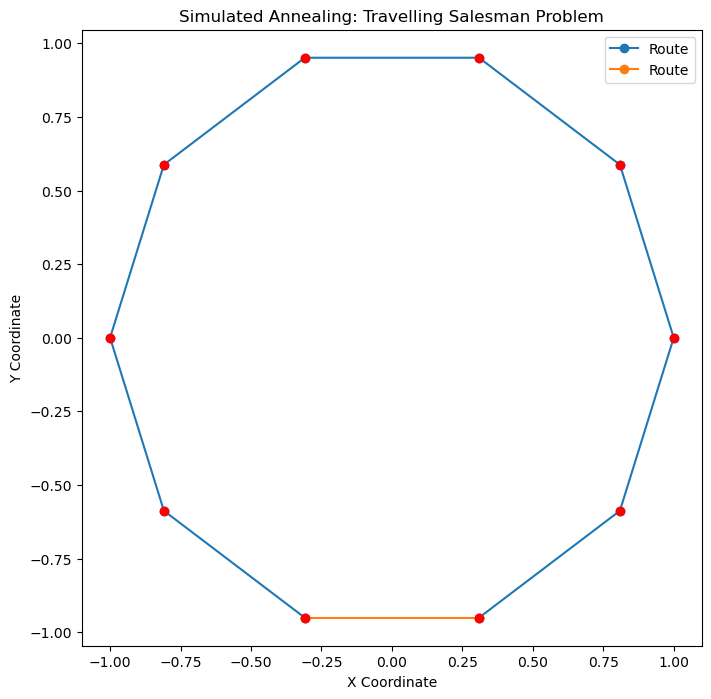

In [81]:
# Simulated Annealing for the Traveling Salesman Problem

def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def total_distance(route, distance_matrix):
    return sum(distance_matrix[route[i], route[i+1]] for i in range(len(route) - 1)) + distance_matrix[route[-1], route[0]]

def cooling_scheme1(temp,k):
    return temp / np.sqrt(1 + k)

def cooling_scheme2(temp,k):
    return np.log(k+1)*temp

def simulated_annealing(coords, initial_temp, cooling_scheme, max_iterations):
    n = len(coords)
    distance_matrix = np.array([[euclidean_distance(coords[i], coords[j]) for j in range(n)] for i in range(n)])
    
    # Initial random route
    current_route = np.random.permutation(n)
    current_cost = total_distance(current_route, distance_matrix)
    
    best_route = np.copy(current_route)
    best_cost = current_cost
    
    for k in range(max_iterations):
        if cooling_scheme == 'sqrt':
            temp = initial_temp / np.sqrt(1 + k)
        else :
            temp = -np.log(k + 1)
        
        # Generate new candidate route by swapping two random cities
        new_route = np.copy(current_route)
        i, j = np.random.choice(n, 2, replace=False)
        new_route[i], new_route[j] = new_route[j], new_route[i]
        new_cost = total_distance(new_route, distance_matrix)
        
    
        if new_cost < current_cost or np.random.rand() < np.exp((current_cost - new_cost) / temp):
            current_route = new_route
            current_cost = new_cost
            
            if current_cost < best_cost:
                best_route = np.copy(current_route)
                best_cost = current_cost
    
    return best_route, best_cost

def plot_route(coords, route):
    plt.figure(figsize=(8, 8))
    plt.plot(coords[route, 0], coords[route, 1], 'o-', label='Route')
    plt.plot([coords[route[-1], 0], coords[route[0], 0]], [coords[route[-1], 1], coords[route[0], 1]], 'o-', label='Route')
    plt.scatter(coords[:, 0], coords[:, 1], c='red', zorder=5)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Simulated Annealing: Travelling Salesman Problem')
    plt.legend()
    plt.show()

# Example with stations on a circle
n_stations = 10
angles = np.linspace(0, 2 * np.pi, n_stations, endpoint=False)
coords = np.array([[np.cos(angle), np.sin(angle)] for angle in angles])

initial_temp = 10
cooling_rate = 'sqrt'
max_iterations = 10000

best_route, best_cost = simulated_annealing(coords, initial_temp, cooling_rate, max_iterations)
print(best_cost)
plot_route(coords, best_route)


## Applying real dataset

883.0


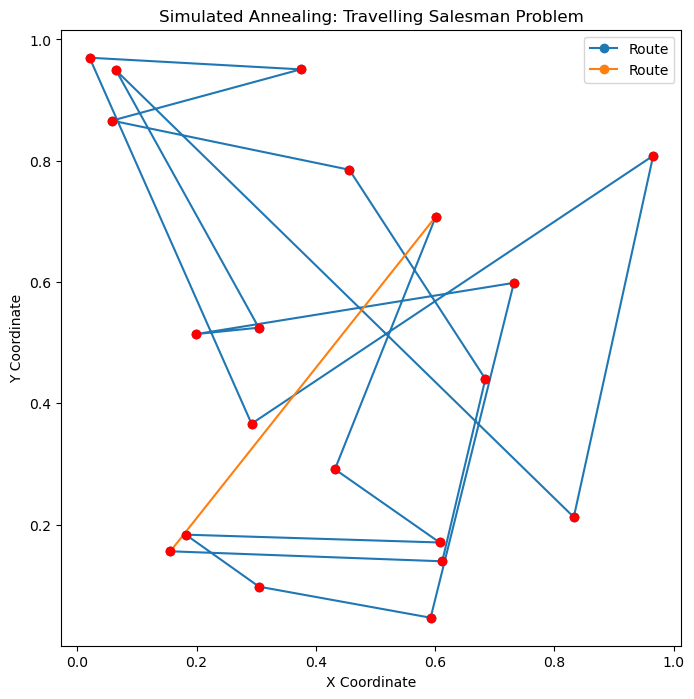

In [83]:
# Simulated Annealing for the Traveling Salesman Problem
np.random.seed(42)
def total_distance(route, cost_matrix):
    return sum(cost_matrix[route[i], route[i+1]] for i in range(len(route) - 1)) + cost_matrix[route[-1], route[0]]

def simulated_annealing(cost_matrix, initial_temp, cooling_rate, max_iterations):
    n = len(cost_matrix)
    
    # Initial random route
    current_route = np.random.permutation(n)
    current_cost = total_distance(current_route, cost_matrix)
    
    best_route = np.copy(current_route)
    best_cost = current_cost
    
    for k in range(max_iterations):
        #temp = initial_temp*np.log(1+k)
        temp = initial_temp / np.sqrt(1 + k)
        
        # Generate new candidate route by swapping two random cities
        new_route = np.copy(current_route)
        i, j = np.random.choice(n, 2, replace=False)
        new_route[i], new_route[j] = new_route[j], new_route[i]
        new_cost = total_distance(new_route, cost_matrix)
        
        if new_cost < current_cost or np.random.rand() < np.exp((current_cost - new_cost) / temp):
            current_route = new_route
            current_cost = new_cost
            
            if current_cost < best_cost:
                best_route = np.copy(current_route)
                best_cost = current_cost
    
    return best_route, best_cost

def plot_route(coords, route):
    plt.figure(figsize=(8, 8))
    plt.plot(coords[route, 0], coords[route, 1], 'o-', label='Route')
    plt.plot([coords[route[-1], 0], coords[route[0], 0]], [coords[route[-1], 1], coords[route[0], 1]], 'o-', label='Route')
    plt.scatter(coords[:, 0], coords[:, 1], c='red', zorder=5)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Simulated Annealing: Travelling Salesman Problem')
    plt.legend()
    plt.show()

# Load cost matrix from CSV file
cost_matrix = np.loadtxt('cost.csv', delimiter=',')
# Generate dummy coordinates for plotting purposes
n = len(cost_matrix)
coords = np.random.rand(n, 2)

initial_temp = 100
cooling_rate = 0.99
max_iterations = 10000

best_route, best_cost = simulated_annealing(cost_matrix, initial_temp, cooling_rate, max_iterations)
print(best_cost)
plot_route(coords, best_route)